In [ ]:
from google.colab import files
uploaded = files.upload()


Saving titanic_data.csv to titanic_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv("titanic_data.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


DATA CLEANING

In [ ]:
# Checking total missing values
df.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
# Count duplicates before
df.duplicated().sum()

# Remove duplicates
df = df.drop_duplicates()

# Verify
df.duplicated().sum()


np.int64(0)

In [ ]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Fare'] = pd.to_numeric(df['Fare'], errors='coerce')
df['Pclass'] = df['Pclass'].astype(int)


In [ ]:
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)


/tmp/ipython-input-3144285523.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
/tmp/ipython-input-3144285523.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [ ]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'].fillna(df['Sex'].mode()[0], inplace=True)


/tmp/ipython-input-3100629267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-3100629267.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [ ]:
import numpy as np

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


In [ ]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df = df[(df['Age'] >= lower) & (df['Age'] <= upper)]


In [ ]:
df.info()
df.describe()
df.isnull().sum()
df.shape


<class 'pandas.core.frame.DataFrame'>
Index: 708 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  708 non-null    int64  
 1   Survived     708 non-null    int64  
 2   Pclass       708 non-null    int64  
 3   Name         708 non-null    object 
 4   Sex          708 non-null    object 
 5   Age          708 non-null    float64
 6   SibSp        708 non-null    int64  
 7   Parch        708 non-null    int64  
 8   Ticket       708 non-null    object 
 9   Fare         708 non-null    float64
 10  Cabin        95 non-null     object 
 11  Embarked     708 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 71.9+ KB


(708, 12)

EXPLORATORY DATA ANALYSIS

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')


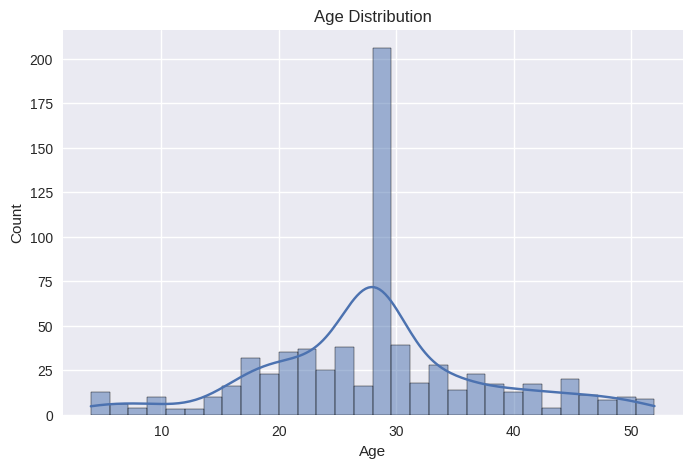

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.show()


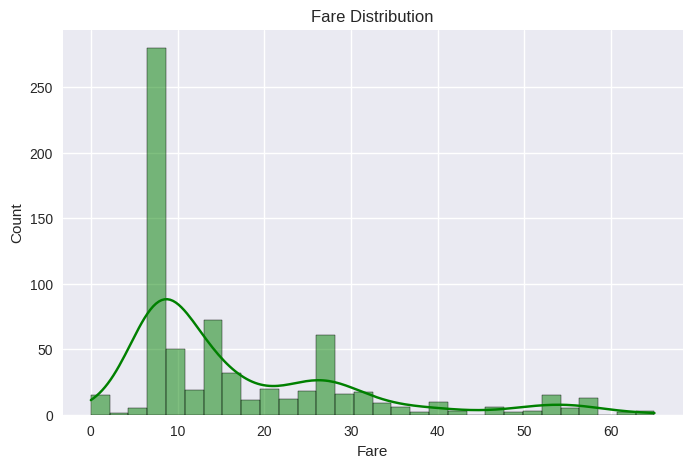

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['Fare'], kde=True, bins=30, color='green')
plt.title("Fare Distribution")
plt.show()


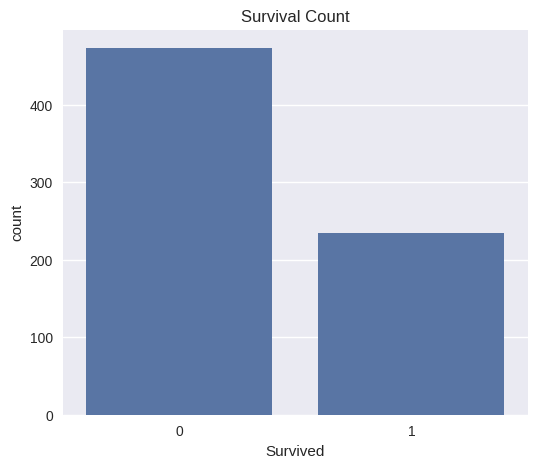

In [ ]:
plt.figure(figsize=(6,5))
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()


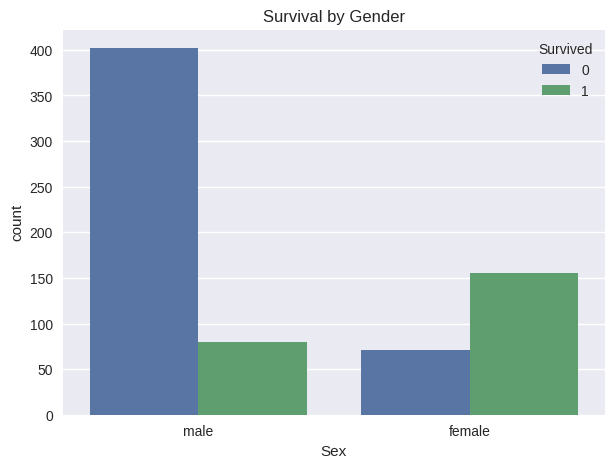

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Survival by Gender")
plt.show()


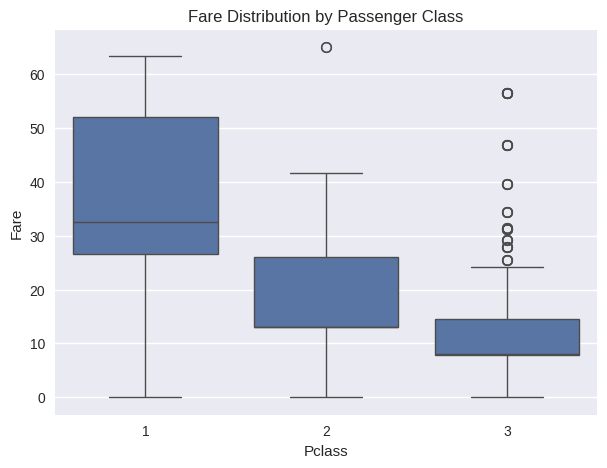

In [ ]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title("Fare Distribution by Passenger Class")
plt.show()


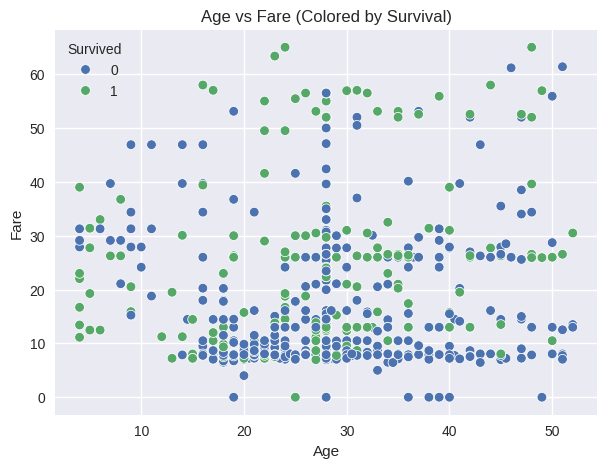

In [ ]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Age', y='Fare', hue='Survived', data=df)
plt.title("Age vs Fare (Colored by Survival)")
plt.show()


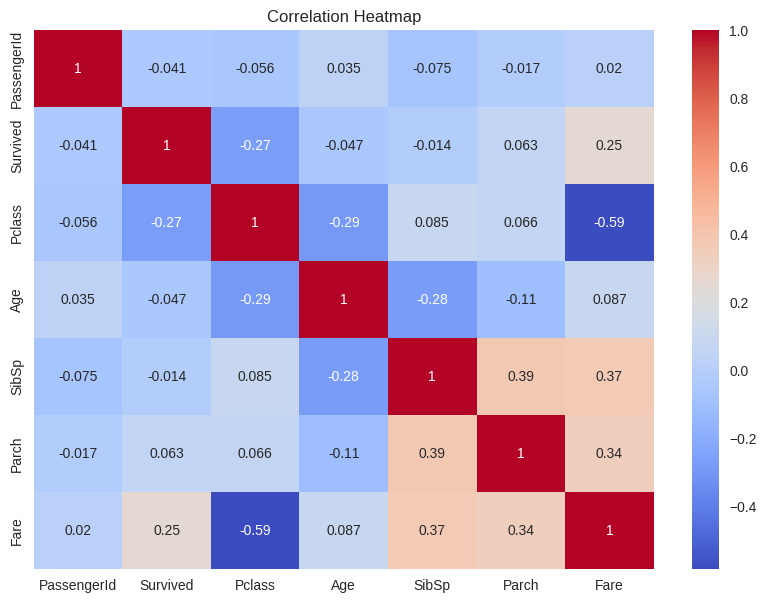

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

FEATURE ENGINEERING

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0


In [ ]:
if 'Embarked' in df.columns:
    df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
else:
    print("'Embarked' column not found, possibly already encoded or dropped.")

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [ ]:
df['IsAlone'] = 1
df.loc[df['FamilySize'] > 1, 'IsAlone'] = 0


In [ ]:
df['AgeGroup'] = pd.cut(df['Age'],
                        bins=[0, 12, 20, 40, 60, 100],
                        labels=['Child', 'Teen', 'Adult', 'Middle', 'Senior'])


In [ ]:
df['AgeGroup'] = df['AgeGroup'].astype(str)
df = pd.get_dummies(df, columns=['AgeGroup'], drop_first=True)


In [ ]:
df = df.drop(['Name', 'Ticket', 'Cabin'], axis=1, errors='ignore')


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(df[['Age', 'Fare', 'FamilySize']])


In [ ]:
y = df['Survived']
X = df.drop(['Survived'], axis=1)


MODEL TRAINING

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    random_state=42
)

rf.fit(X_train, y_train)


RandomForestClassifier(max_depth=10, n_estimators=200, random_state=42)

In [ ]:
y_pred_lr = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)


MODEL EVALUATION

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, classification_report


In [ ]:
print("====== Logistic Regression ======")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


====== Logistic Regression ======
Accuracy: 0.7816901408450704
Precision: 0.6888888888888889
Recall: 0.6458333333333334
F1-Score: 0.6666666666666666

Confusion Matrix:
 [[80 14]
 [17 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.84        94
           1       0.69      0.65      0.67        48

    accuracy                           0.78       142
   macro avg       0.76      0.75      0.75       142
weighted avg       0.78      0.78      0.78       142



In [ ]:
print("====== Random Forest ======")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


====== Random Forest ======
Accuracy: 0.823943661971831
Precision: 0.8285714285714286
Recall: 0.6041666666666666
F1-Score: 0.6987951807228916

Confusion Matrix:
 [[88  6]
 [19 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.94      0.88        94
           1       0.83      0.60      0.70        48

    accuracy                           0.82       142
   macro avg       0.83      0.77      0.79       142
weighted avg       0.82      0.82      0.82       142



In [ ]:
# Logistic Regression ROC-AUC
auc_lr = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:,1])

# Random Forest ROC-AUC
auc_rf = roc_auc_score(y_test, rf.predict_proba(X_test)[:,1])

print("\nROC-AUC Logistic Regression:", auc_lr)
print("ROC-AUC Random Forest:", auc_rf)



ROC-AUC Logistic Regression: 0.8583776595744681
ROC-AUC Random Forest: 0.8512854609929077


In [ ]:
results = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_lr),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision": [
        precision_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall": [
        recall_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_rf)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_rf)
    ],
    "ROC-AUC": [auc_lr, auc_rf]
}

results_df = pd.DataFrame(results)
results_df


,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.781690,0.688889,0.645833,0.666667,0.858378
1,Random Forest,0.823944,0.828571,0.604167,0.698795,0.851285


MODEL DEPLOYMENT

In [ ]:
import joblib

joblib.dump(rf, "model.pkl")
print("Model saved as model.pkl")


Model saved as model.pkl


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

# Load model
model = joblib.load("model.pkl")

app = Flask(__name__)

@app.route('/')
def home():
    return "Titanic Survival Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()

    # Convert input to array
    input_data = np.array([list(data.values())])

    # Predict
    prediction = model.predict(input_data)[0]

    result = "Survived" if prediction == 1 else "Not Survived"
    return jsonify({"prediction": int(prediction), "result": result})

if __name__ == "__main__":
    app.run()


Writing app.py


start

In [ ]:
!pip install pyngrok


In [ ]:
%%writefile app.py
from flask import Flask, request, jsonify
import joblib
import numpy as np

model = joblib.load("model.pkl")

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array([list(data.values())])
    prediction = model.predict(input_data)[0]
    result = "Survived" if prediction == 1 else "Not Survived"
    return jsonify({"prediction": int(prediction), "result": result})

@app.route('/')
def home():
    return "API is Running"


Overwriting app.py


In [ ]:
from pyngrok import ngrok

# Authenticate
ngrok.set_auth_token("22JMMllsvDuCGT76bpg6YxAE_75PvDM4EwZygG2xR9XKWc")

# Start tunnel on port 5000
public_url = ngrok.connect(5000)
print("PUBLIC URL:", public_url)


PUBLIC URL: NgrokTunnel: "https://overgraciously-nonmanual-kayden.ngrok-free.dev" -> "http://localhost:5000"


In [ ]:
!python3 app.py


In [ ]:
!python3 app.py --debug
